In [2]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np
import netCDF4 as nc
np.set_printoptions(threshold=100000)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union
from datetime import datetime, timedelta
import time
import warnings
import statsmodels.api as sm
import datetime

warnings.filterwarnings('ignore')

from my_functions import sat_vap_press, vap_press, hot_dry_windy, haines

In [11]:
dat = nc.Dataset('../2020/Apr2020_to_Oct2020/Hourly_Emissions_FV3_13km_202008180000_202008182300.nc')
print(dat['Longitude'])

<class 'netCDF4._netCDF4.Variable'>
float32 Longitude(Latitude, Longitude)
    long_name: cell corner longitude
    standard_name: Longitude
    units: degree_east
    axis: X
    bounds: [227.506, 297.434]
    valid_range: [227.506 297.434]
    scale_factor: 1.0
    add_offset: 0.0
    _FillValue: -9999.0
unlimited dimensions: 
current shape = (233, 397)
filling on


In [13]:
lon_corner = dat['Longitude'][:]
lat_corner = dat['Latitude'][:]
#print(lon_corner-360)
lat_center, lon_center = calculate_grid_cell_corners(lat_corner, lon_corner)
print(lat_center.shape)
print(lat_corner.shape) #these are the CORNERS OF THE CELL
print(lat_center)
oc = np.sum(dat['OC'][:], axis=2) #sum up OC emissions over the day, OC has units of kilograms
print(oc.shape)

print(dat['area'])

(232, 396)
(233, 397)
[[22.206649780273438 22.234600067138672 22.262413024902344
  22.290088653564453 22.317628860473633 22.34503173828125
  22.372295379638672 22.399423599243164 22.426414489746094
  22.453266143798828 22.479984283447266 22.506561279296875
  22.533000946044922 22.55930519104004 22.585472106933594
  22.611499786376953 22.63739013671875 22.663143157958984
  22.68875503540039 22.7142333984375 22.739572525024414
  22.764772415161133 22.78983497619629 22.81475830078125
  22.83954620361328 22.864192962646484 22.888702392578125
  22.913074493408203 22.937305450439453 22.96139907836914
  22.985355377197266 23.009170532226562 23.032848358154297
  23.05638885498047 23.079788208007812 23.10304832458496
  23.126171112060547 23.149154663085938 23.171998977661133
  23.194704055786133 23.217269897460938 23.239696502685547
  23.261981964111328 23.284130096435547 23.306137084960938
  23.328006744384766 23.349735260009766 23.371322631835938
  23.392772674560547 23.414081573486328 23.414

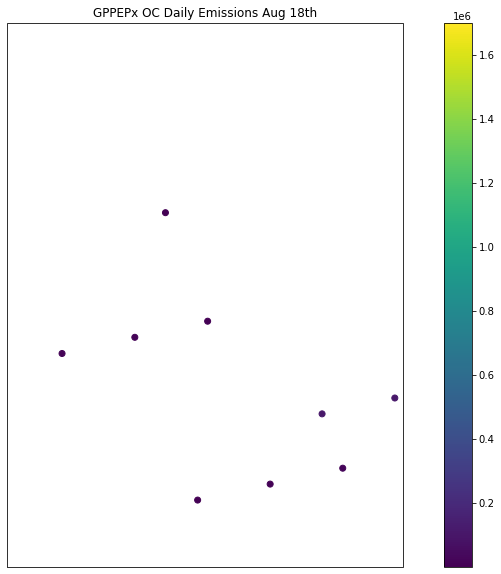

In [9]:
fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-123.4, -122.6, 39.4, 40.5])
ax.coastlines()
ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)
plt.scatter(lon_center,lat_center, c=oc)
plt.title('GPPEPx OC Daily Emissions Aug 18th')
plt.colorbar()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-126, -101, 31, 50])
ax.coastlines()
ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)
plt.scatter(lon_center,lat_center, c='r', s=0.1)
plt.scatter(lon_corner,lat_corner, c='b', s=0.1)

plt.title('GPPEPx OC Daily Emissions Aug 18th')
plt.colorbar()
plt.show()

In [5]:
def calculate_grid_cell_corners(LAT, LON):
    #we will assume the very edges of the polygons don't touch the boundary of the domain
    lat_corners = (LAT[0:(LAT.shape[0]-1),  0:(LAT.shape[1])-1] + LAT[1:(LAT.shape[0]), 1:(LAT.shape[1])])/2
    lon_corners = (LON[0:(LAT.shape[0]-1),  0:(LAT.shape[1])-1] + LON[1:(LAT.shape[0]), 1:(LAT.shape[1])])/2
    return lat_corners, lon_corners